# MINI PROJECT

## TELCO CUSTOMER CHURN PREDICTION

#### SECTION 1 - PREPROCESSING AND EXPLORATORY DATA ANALYSIS

## Context
> "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

## Content
> Each row represents a customer, each column contains customer’s attributes described on the column Metadata.
> 
> The data set includes information about:
> 
> - Customers who left within the last month – the column is called Churn
> - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
> - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
> - Demographic info about customers – gender, age range, and if they have partners and dependents

## Feature Descriptions

> customerID - Customer's ID.
> 
> gender - Customer's gender.
> 
> SeniorCitizen - Whether the customer is a senior citizen or not.
> 
> Partner - Whether the customer has a partner or not.
> 
> Dependents - Whether the customer has dependents or not.
> 
> tenure - How long has the customer subscribed in months.
> 
> PhoneService - Whether the customer has a phone service or not.
> 
> MultipleLines - Whether the customer has multiple lines or not.
> 
> InternetService - Customer’s internet service provider status.
> 
> OnlineSecurity - Whether the customer has online security or not.
> 
> OnlineBackup - Whether the customer has online backup or not.
> 
> DeviceProtection - Whether the customer has device protection or not.
> 
> TechSupport - Whether the customer has tech support or not.
> 
> StreamingTV - Whether the customer has streaming TV or not.
> 
> StreamingMovies - Whether the customer has streaming movies or not.
> 
> Contract - The customer's contract term.
> 
> PaperlessBilling - Whether the customer has paperless billing or not.
> 
> PaymentMethod - The customer’s payment method.
> 
> MonthlyCharges - The amount charged to the customer (monthly).
> 
> TotalCharges - The total amount charged to the customer.
> 
> Churn - Whether the customer churned or not churned.

## IMPORT LIBRARIES

In [1]:
# import all necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

## OVERVIEW

>Disini kita akan memeriksa data untuk Data Quality Checking

> 1. Load semua datanya

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> Dari data diatas bisa kita lihat bahwa dataset tersebut sudah bersih, tidak ada ditemukan null values.
>
> Namun terdapat beberapa features yang tidak sesuai dengan tipe datanya, seperti TotalCharges dan SeniorCitizen

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


> Describe diatas adalah ringkasan / summary dari kolom kolom yg ada pada dataset ini. Bisa kita lihat diatas mencakup count / jumlah values, mean / rerata, standard deviation, min values, max values, and quantiles / kuartil.

> Dibawah ini ialah deskripsi pada categorical feature pada dataset. Bisa kita lihat ada count (banyak valuesnya), unique (banyak tipe kategori valuesnya), top (menampilkan kategori terbanyak dari suatu kolom), dan freq (frekuensi dari kategori yg muncul terbanyak itu)

In [8]:
df.describe(include = 'object').T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## PREPROCESSING

> Kita cek data type dan null values dari kolom yg akan kita rubah

In [9]:
pd.DataFrame({'Features' : df[['SeniorCitizen', 'TotalCharges']].columns, 
              'Data Type' : df[['SeniorCitizen', 'TotalCharges']].dtypes, 
              'Null Values' : df[['SeniorCitizen', 'TotalCharges']].isna().sum()}).reset_index(drop = True)

,Features,Data Type,Null Values
0,SeniorCitizen,int64,0
1,TotalCharges,object,0


> Kita akan merubah SeniorCitizen dari int ke object, agar bisa dikelompokkan ke categorical features nantinya.

In [10]:
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace = True)

> Selanjutnya kita akan mengubah tipe data TotalCharges dari object menjadi float

In [11]:
index_err = []

for index,col in enumerate(df['TotalCharges']):
    try:
        float(col)
    except:
        index_err.append(index)

In [12]:
index_err

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

> terdapat 11 rows yang mengalami error saat dirubah kedalam float, error ini dikarenakan adanya ' ' / string spasi didalam values

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # error akan dirubah menjadi Null Values

> Note: pandas.to_numeric<br>
>
>errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
>- If ‘raise’, then invalid parsing will raise an exception.
>- If ‘coerce’, then invalid parsing will be set as NaN.
>- If ‘ignore’, then invalid parsing will return the input.

> Kita cek kembali tipe data serta null valuesnya

In [14]:
pd.DataFrame({'Features' : df[['SeniorCitizen', 'TotalCharges']].columns, 
              'Data Type' : df[['SeniorCitizen', 'TotalCharges']].dtypes, 
              'Null Values' : df[['SeniorCitizen', 'TotalCharges']].isna().sum()}).reset_index(drop = True)

,Features,Data Type,Null Values
0,SeniorCitizen,object,0
1,TotalCharges,float64,11


In [15]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


> Berdasarkan data yg kita lihat diatas, data Null Values memiliki kesamaan, dimana mereka bukanlah SeniorCitizen, Memiliki Dependents, Tenure = 0, dan tidak Churn.
>
> Mungkin kita bisa menganggap kalau mereka adalah customer baru yg tidak memiliki tagihan, karena tenure / lama berlangganannya = 0
>
> Maka dari itu kita akan mengisi nilai Null Valuesnya dengan 0

In [16]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [17]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

> Data sudah bersih dari null values dan sesuai dengan tipe datanya.

> Kita akan kelompokkan data numerical dan categoricalnya.

In [18]:
df_cat = df.select_dtypes(['object']).drop(columns = 'customerID')
df_num = df.select_dtypes(['int', 'float'])

In [19]:
df_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [20]:
df_num.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


> Selanjutnya kita akan melakukan EDA

## EXPLORATORY DATA ANALYSIS

### TARGET FEATURE

> Kita akan melihat target featurenya terlebihdahulu

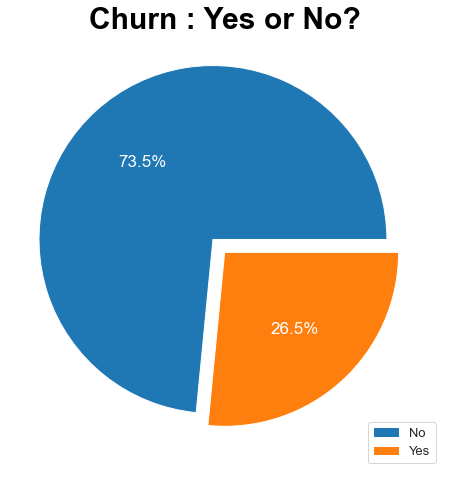

In [21]:
plt.figure(figsize = (12, 8))

plt.title('Churn : Yes or No?', size = 30, fontweight = 'bold', color = 'black')

labels = 'No', 'Yes'

plt.pie(df['Churn'].value_counts(), autopct = '%.1f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower right', fontsize = 13)

plt.show()

In [22]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

> Berdasarkan pie chart diatas, kita bisa melihat bahwa ada sekitar 27% (1869) Customer Churn dan 73% (5174) tidak.

> Selanjutnya kita akan cek pada numerical featuresnya

## NUMERICAL FEATURES

> Pertama-tama kita akan menganalisa terlebihdahulu korelasi dari data numerical ini.

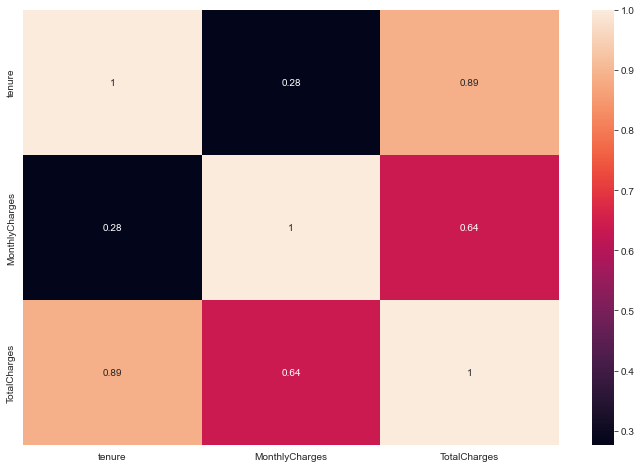

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr('spearman'), annot = True)
plt.show()

> Dari heatmap diatas bisa kita lihat bahwa TotalCharges memiliki korelasi yg tinggi terhadap tenure, kemudian diikuti oleh TotalCharge dengan MonthlyCharges

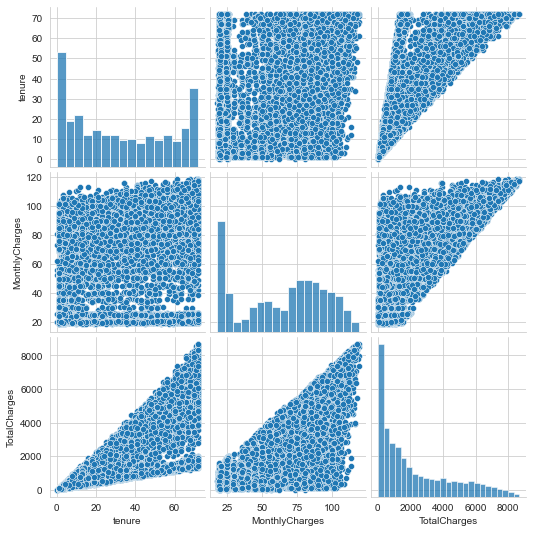

In [24]:
# menampilkan pairplot untuk features numerical
sns.pairplot(df_num)
plt.show()

> Dari pairplot diatas bisa kita lihat bahwa pola penyebarannya masih beragam, tetapi terlihat Tenure dan TotalCharges yang hampir mendekati pola linear relationship

> Selanjutnya kita akan melihat distribusi target berdasarkan masing masing features.

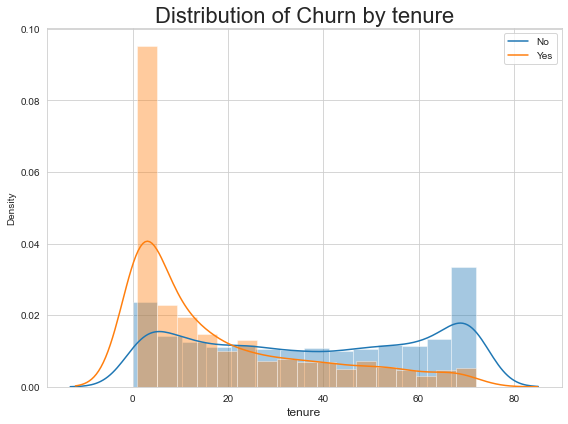

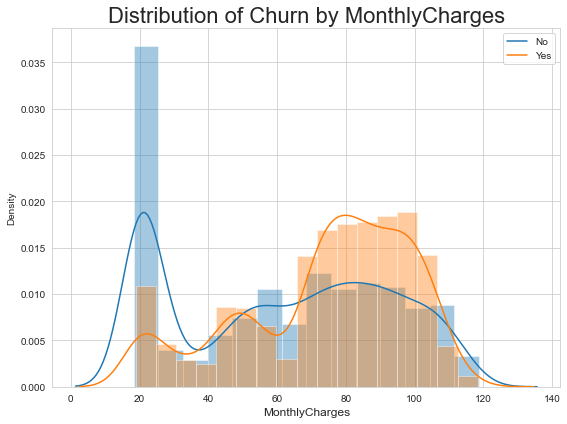

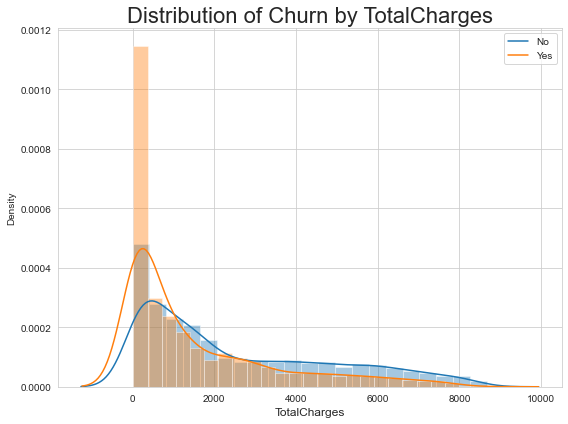

In [25]:
for i in df_num.columns:
    plt.figure(figsize = (8,6))
    ax = sns.distplot(df[(df['Churn'] == 'No')][i])
    ax = sns.distplot(df[(df['Churn'] == 'Yes')][i])
    
    ax.legend(['No', 'Yes'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of Churn by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

> Kita akan coba mengeksplor lebih rinci terkait informasi dari distribusi plot diatas

- #### Tenure

> Disini terlihat kebanyakan customers yang churn ialah customers yang sudah berlangganan selama 1 bulan, semakin tinggi tenurenya semakin sedikit pula customer yg churn.

In [26]:
df_num['tenure'][df['Churn']=='Yes'].value_counts().head(10)

1     380
2     123
3      94
4      83
5      64
7      51
9      46
10     45
8      42
6      40
Name: tenure, dtype: int64

In [27]:
df_num['tenure'][df['Churn']=='No'].value_counts().head()

72    356
1     233
71    164
2     115
70    108
Name: tenure, dtype: int64

- #### MonthlyCharges

> Untuk MonthlyCharges / biaya bulanan customer yg churn terlihat lebih besar dibandingkan dengan customer yg tidak churn. Mungkin ini salahsatu penyebab customer tersebut berhenti berlangganan.

In [28]:
df_num['MonthlyCharges'][df['Churn']=='Yes'].value_counts().head(10)

74.40    13
74.90     9
74.95     8
45.30     8
70.15     7
93.85     7
85.35     7
70.30     7
70.00     7
94.40     7
Name: MonthlyCharges, dtype: int64

In [29]:
df_num['MonthlyCharges'][df['Churn']=='No'].value_counts().head(10)

20.05    58
19.70    41
19.95    41
19.85    40
19.90    40
20.00    40
19.65    39
19.55    38
20.25    35
20.35    35
Name: MonthlyCharges, dtype: int64

- #### TotalCharges

> Pada TotalCharges ini juga terlihat bahwa total biaya yg dibebankan kepada customer yg churn itu lebih besar dibandingkan dengan customer yg tidak churn.

In [30]:
df_num['TotalCharges'][df['Churn']=='Yes'].value_counts().head()

20.20    6
45.30    5
69.65    4
20.15    4
19.90    4
Name: TotalCharges, dtype: int64

In [31]:
df_num['TotalCharges'][df['Churn']=='No'].value_counts().head()

0.00     11
19.75     7
20.05     6
19.55     6
19.65     6
Name: TotalCharges, dtype: int64

> Menurut saya cukup sampai disini saja untuk numerical features, selanjutnya kita analisa categorical featuresnya.

## CATEGORICAL FEATURES

In [32]:
# Cramer's V measures the relation between two variables in categorical scale.

def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [33]:
# Correlation between categorical features
corr = []
for i in df_cat.columns:
    matrix = []
    for j in df_cat.columns:
        matrix.append(cramersv(df_cat[i], df_cat[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index = df_cat.columns, columns = df_cat.columns)

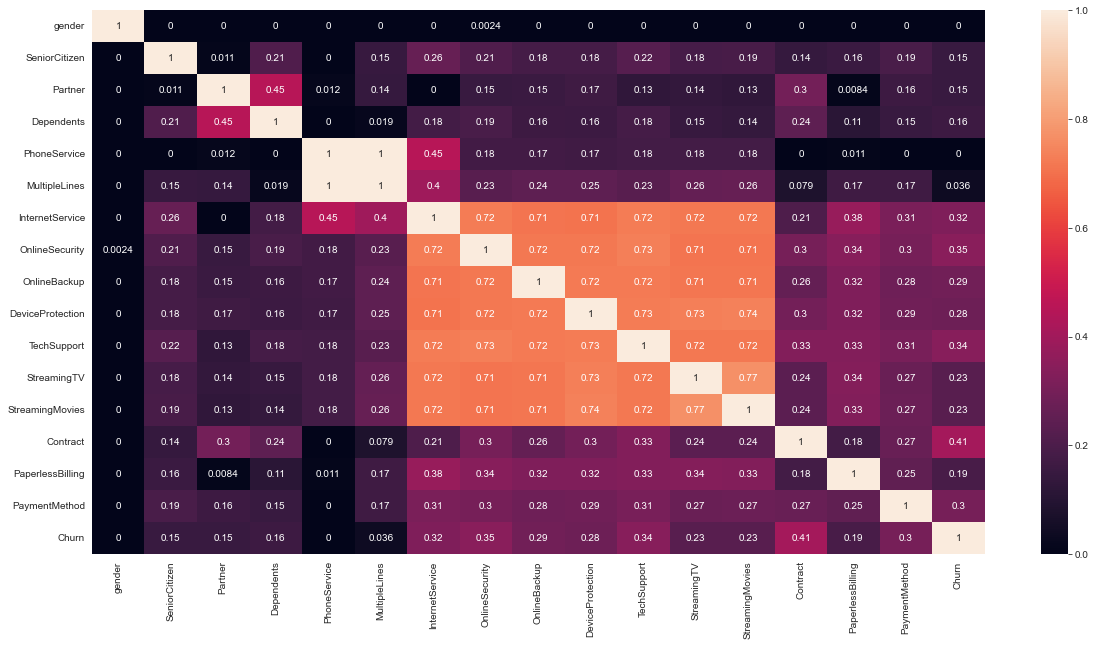

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_cat, annot = True)
plt.show()

> Berdasarkan heatmap diatas bisa kita lihat ada beberapa features yg berkorelasi cukup tinggi > 0.70

> Selanjutnya saya akan menunjukkan hubungan antara features ini menggunakan pd.crosstab()

> Menurut saya crosstab dibawah ini sudah cukup jelas.

In [41]:
pd.crosstab(df_cat['StreamingTV'], df_cat['StreamingMovies'], normalize = 'columns')

StreamingMovies,No,No internet service,Yes
StreamingTV,,,
No,0.724596,0.0,0.289898
No internet service,0.000000,1.0,0.000000
Yes,0.275404,0.0,0.710102


> Pada crosstab diatas bisa kita lihat bahwa:
> - ada sebanyak 72% customer tidak melakukan streaming movies dan TV

In [35]:
pd.crosstab(df_cat['InternetService'], df_cat['OnlineSecurity'], normalize = 'columns')

OnlineSecurity,No,No internet service,Yes
InternetService,,,
DSL,0.354774,0.0,0.584448
Fiber optic,0.645226,0.0,0.415552
No,0.000000,1.0,0.000000


> Pada crosstab diatas bisa kita lihat bahwa:
> - ada 64% customer yang berlangganan InternetService (Fiber Optic) tetapi belum memiliki OnlineSecurity
> - ada 58% customer yang berlangganan InternetService (DSL) dan memiliki OnlineSecurity

In [42]:
pd.crosstab(df_cat['OnlineBackup'], df_cat['DeviceProtection'], normalize = 'columns')

DeviceProtection,No,No internet service,Yes
OnlineBackup,,,
No,0.641034,0.0,0.455822
No internet service,0.000000,1.0,0.000000
Yes,0.358966,0.0,0.544178


> Pada crosstab diatas bisa kita lihat bahwa:
> - ada 64% customer tidak memiliki OnlineBackup dan DeviceProtection

> Begitu juga untuk yg lainnya.

In [36]:
pd.crosstab(df_cat['InternetService'], df_cat['TechSupport'], normalize = 'columns')

TechSupport,No,No internet service,Yes
InternetService,,,
DSL,0.357904,0.0,0.576321
Fiber optic,0.642096,0.0,0.423679
No,0.000000,1.0,0.000000


In [37]:
pd.crosstab(df_cat['InternetService'], df_cat['StreamingTV'], normalize = 'columns')

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,0.520996,0.0,0.353528
Fiber optic,0.479004,0.0,0.646472
No,0.000000,1.0,0.000000


In [38]:
pd.crosstab(df_cat['InternetService'], df_cat['StreamingMovies'], normalize = 'columns')

StreamingMovies,No,No internet service,Yes
InternetService,,,
DSL,0.517056,0.0,0.359078
Fiber optic,0.482944,0.0,0.640922
No,0.000000,1.0,0.000000


In [39]:
pd.crosstab(df_cat['InternetService'], df_cat['DeviceProtection'], normalize = 'columns')

DeviceProtection,No,No internet service,Yes
InternetService,,,
DSL,0.438126,0.0,0.439719
Fiber optic,0.561874,0.0,0.560281
No,0.000000,1.0,0.000000


> Langkah selanjutnya kita akan melakukan eksplorasi menyeluruh pada categorical features.<br>
Disini kolom Churn akan kita drop karena merupakan target feature dan sudah tervisualisasi diawal tadi.

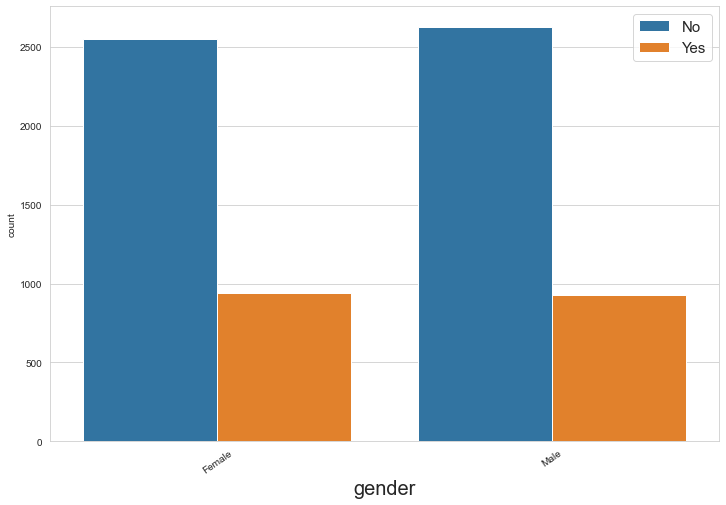

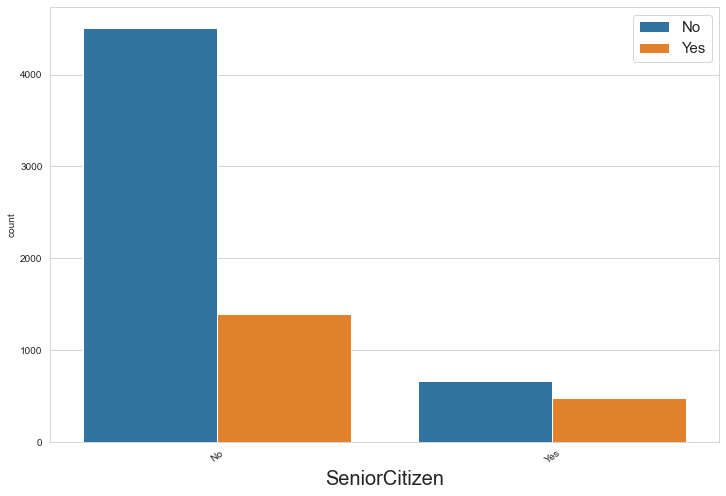

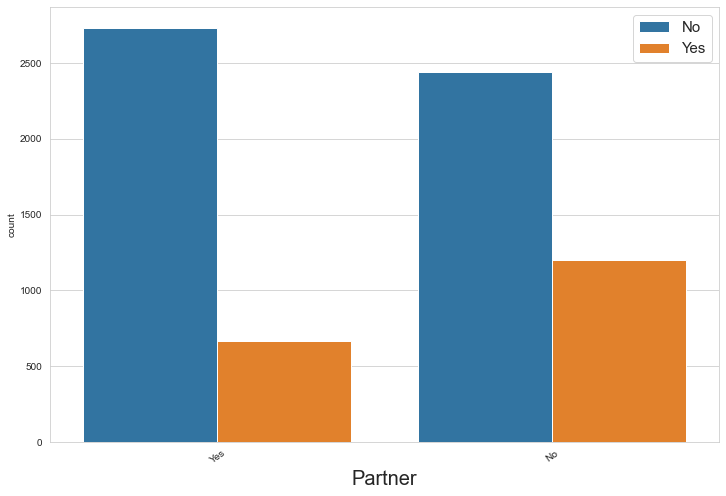

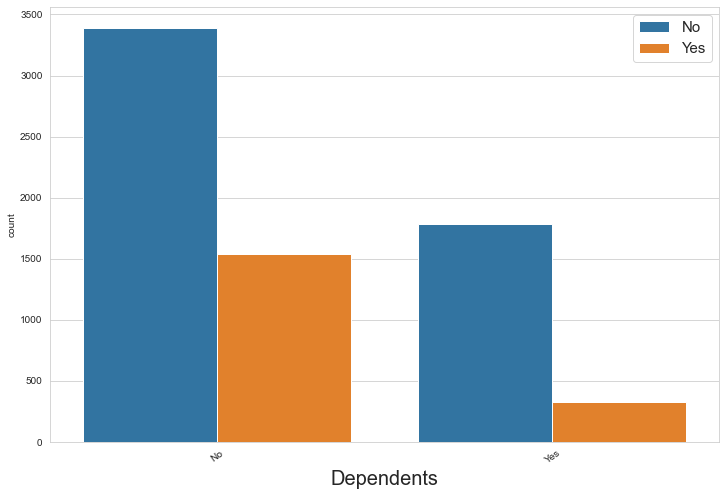

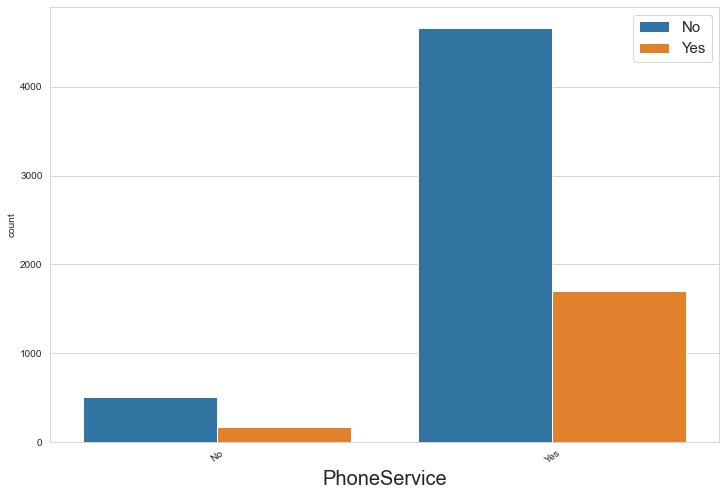

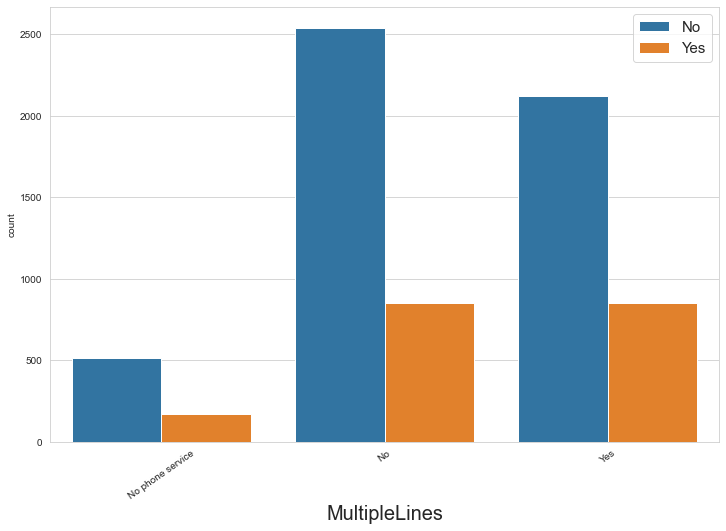

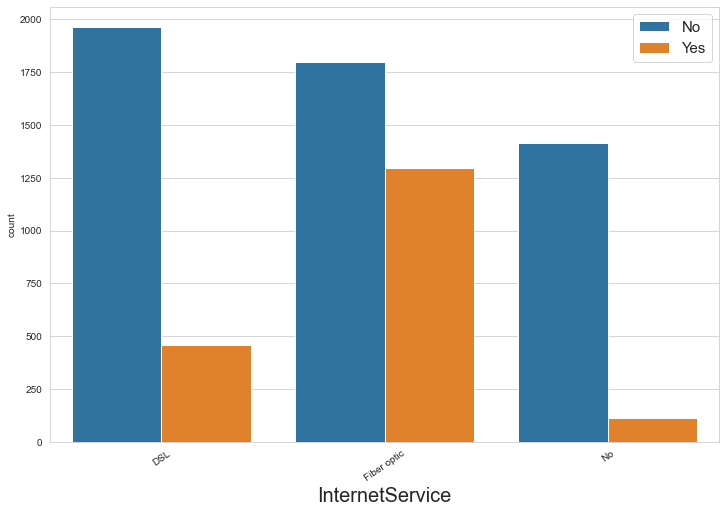

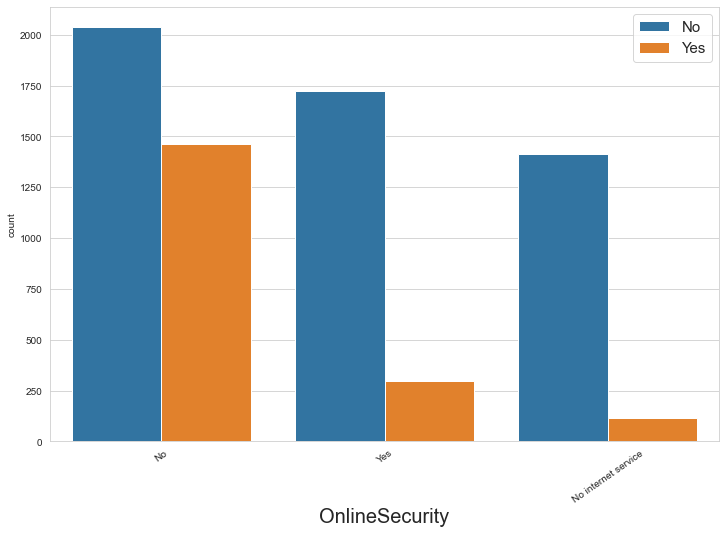

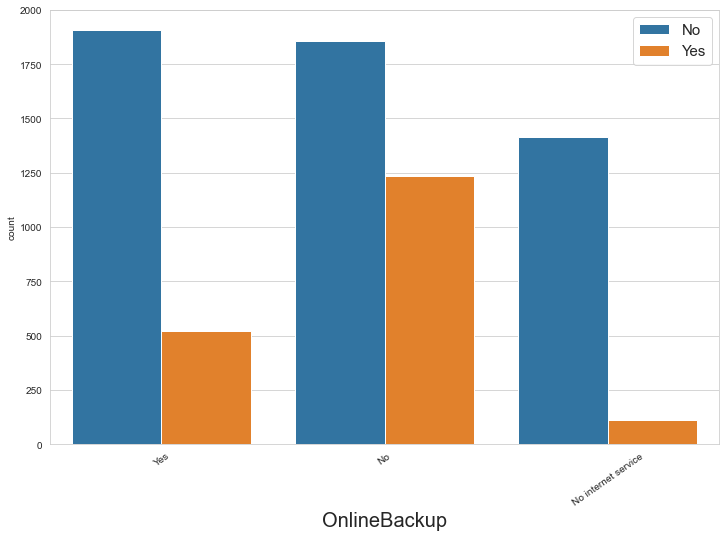

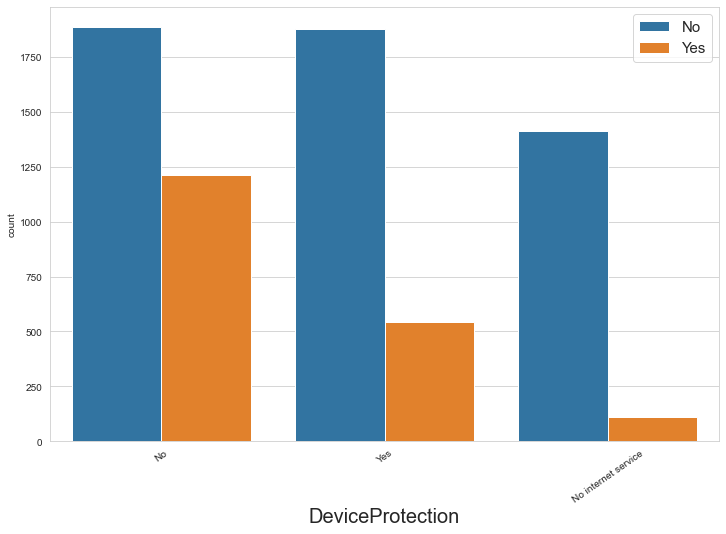

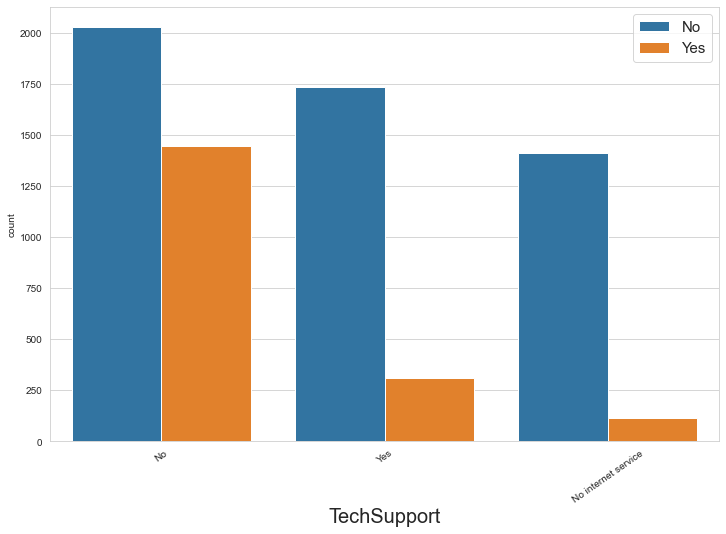

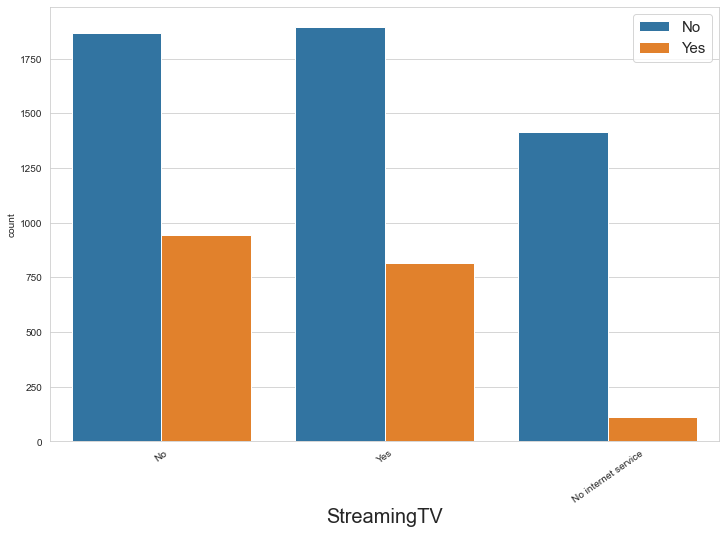

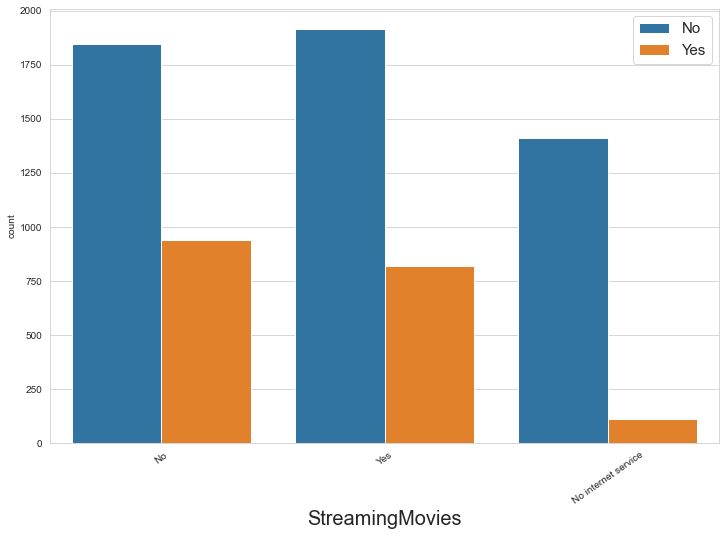

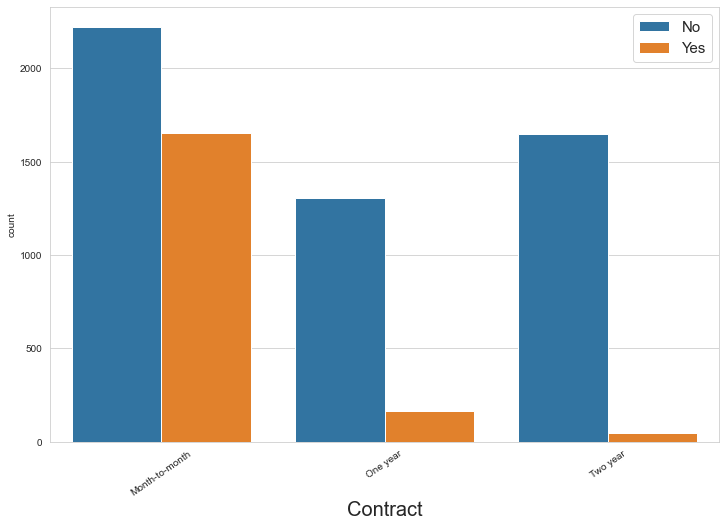

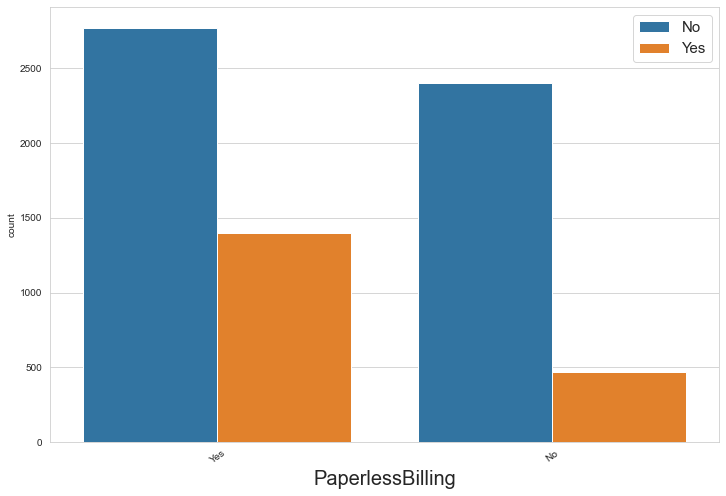

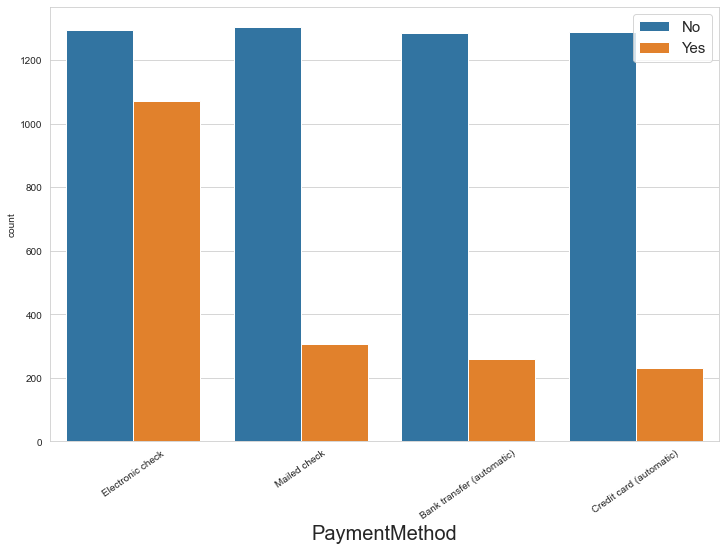

In [44]:
for i in df_cat.drop(columns = 'Churn'):
    plt.figure(figsize = (12,8))
    ax = sns.countplot(x = i, data = df_cat, hue = 'Churn')
    plt.xlabel(i, fontsize = 20)
    plt.legend(loc='upper right', fontsize = 15)
    plt.xticks(rotation = 35)
    plt.tight_layout
    plt.show()

> Dari plot diatas bisa kita simpulkan bahwa customer yang churn ialah customer yang:
> - memiliki Gender Male & Female
> - Kebanyakan dari mereka bukan merupakan Senior Citizen
> - Kebanyakan tidak memiliki partner dan dependent
> - Kebanyakan menggunakan PhoneService
> - Kebanyakan memiliki internet service dengan tipe FiberOptic
> - Kebanyakan dari mereka tidak memiliki OnlineSecurity, OnlineBackup, serta DeviceProtection
> - Kebanyakan tidak menggunakan Tech Support
> - Kebanyakan Memiliki month to month contract
> - Kebanyakan menggunakan PaperlessBilling dan payment method Electronic check

In [45]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  Churn             7043 non-null   object
dtypes: object(17)


> Untuk informasi lebih detailnya ada dibawah ini.

In [57]:
for i in df_cat.drop(columns = 'Churn'):
    print(f"# {i}\n")
    print(df_cat.groupby('Churn')[i].value_counts(), '\n')
    print("-----------------------")

# gender

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64 

-----------------------
# SeniorCitizen

Churn  SeniorCitizen
No     No               4508
       Yes               666
Yes    No               1393
       Yes               476
Name: SeniorCitizen, dtype: int64 

-----------------------
# Partner

Churn  Partner
No     Yes        2733
       No         2441
Yes    No         1200
       Yes         669
Name: Partner, dtype: int64 

-----------------------
# Dependents

Churn  Dependents
No     No            3390
       Yes           1784
Yes    No            1543
       Yes            326
Name: Dependents, dtype: int64 

-----------------------
# PhoneService

Churn  PhoneService
No     Yes             4662
       No               512
Yes    Yes             1699
       No               170
Name: PhoneService, dtype: int64 

-----------------------
# MultipleLines

Churn  MultipleLines   
No     N

## SUMMARY

> Melalui eksplorasi data yg telah kita lakukan, selanjutnya kita dapat menarik kesimpulan bahwa <br>
Kebanyakan Customer yang Churn ialah customer yg :

> Numerical :
> - customers yang tenure = 1 / sudah berlangganan selama 1 bulan
> - semakin tinggi tenurenya / lama berlangganannya maka semakin sedikit pula customer yg churn.
> - memiliki MonthlyCharges dan TotalCharges yang lebih tinggi dibandingkan dengan customer yang tidak churn.

> Categorical :
> - Memiliki Gender Male & Female
> - Bukan merupakan Senior Citizen
> - Tidak memiliki partner dan dependent
> - Menggunakan PhoneService
> - Memiliki internet service dengan tipe FiberOptic
> - Tidak memiliki OnlineSecurity, OnlineBackup, serta DeviceProtection
> - Tidak menggunakan Tech Support
> - Memiliki month to month contract
> - Menggunakan PaperlessBilling dan payment method Electronic check

> Export data yang sudah bersih ke csv

In [61]:
df_clean = df.copy()

In [62]:
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
df_clean.to_csv('Telco-Customer-Churn-Clean.csv', index = False)